## Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt


import folium  #needed for interactive map
from folium.plugins import HeatMap

from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score

%matplotlib inline
sns.set()

## Import File and read first rows

In [ ]:
# Ajustar path file para tomar el path local
pd_oferts = pd.read_csv('/content/drive/My Drive/DS4A/Project/Reto MINTIC/Ofertas/Ofertar.csv',sep=';')
pd_oferts.head(10)

,Nombre Barrio,Codigo Barrio,Codigo Manzana,Codigo Predio,Codigo Construccion,Codigo Resto,Fecha De Cargue,Direccion,Codigo Oferta,Tipo Oferta,Tipo Inmueble,Fuente,Chip,Area Terreno,Area Construida,Vr Inicial Venta,Vr Final Venta,Vr Inicial Arriendo,Vr Final Arriendo
0,ESTACION CENTRAL,6204,17,15,0,0,2019-09-30T00:00:00Z,KR 33 17 27,"5,00E+05",VENTA,Bodega,CAMPO,AAA0251LMRJ,"2060,8",2306,"7,00E+09",6880300000,0,0
1,COOPERATIVA DE SUB-OFICIALES,6501,3,10,0,0,2019-09-30T00:00:00Z,KR 71F 12 02,500001,VENTA,Casa uso mixto,CAMPO,AAA0080RXPP,"100,1","211,3",0,0,0,0
2,ESTACION CENTRAL,6204,4,4,1,6011,2019-09-30T00:00:00Z,CL 14 30 17 AP 611,500002,ARRIENDO,Apartamento,CAMPO,AAA0164RCHY,"18,04","50,44",0,0,0,0
3,ARBORIZADORA ALTA,2568,10,14,0,0,2019-09-30T00:00:00Z,CL 74 SUR 38A 60,500003,ARRIENDO PARCIAL,Casa uso mixto,CAMPO,AAA0028RFAF,42,42,0,0,1200000,1178000
4,ARBORIZADORA ALTA,2568,10,12,0,0,2019-09-30T00:00:00Z,CL 74 SUR 38A 52,500004,VENTA,Casa uso mixto,CAMPO,AAA0028REYN,42,"130,2","1,50E+08",145335000,0,0
5,SAN PABLO BOSA,4524,14,26,0,0,2019-09-30T00:00:00Z,CL 67 SUR 78D 15,500005,ARRIENDO PARCIAL,Casa,CAMPO,AAA0046HECN,184,"347,5",0,0,"5,00E+05",491000
6,BOLONIA,2605,29,9,0,0,2019-09-30T00:00:00Z,CL 81C SUR 4 15 ESTE,500006,VENTA,Casa uso mixto,CAMPO,AAA0144UWUH,"72,3","72,3","5,00E+07",48345000,0,0
7,BOLONIA,2605,29,9,0,0,2019-09-30T00:00:00Z,CL 81C SUR 4 15 ESTE,500007,ARRIENDO PARCIAL,Casa uso mixto,CAMPO,AAA0144UWUH,"72,3","72,3",0,0,380000,373000
8,ARBORIZADORA ALTA,2568,10,9,0,0,2019-09-30T00:00:00Z,CL 74 SUR 38A 40,500008,VENTA,Casa,CAMPO,AAA0028REUH,42,"174,3","1,47E+08",142420000,0,0
9,COOPERATIVA DE SUB-OFICIALES,6501,3,4,0,0,2019-09-30T00:00:00Z,AC 12 71D 32 IN 5,500009,ARRIENDO PARCIAL,Casa uso mixto,CAMPO,AAA0080RXKL,117,"213,05",0,0,850000,850000


In [ ]:
pd_oferts_copy = pd_oferts.copy()

### Columns

In [ ]:
pd_oferts_copy.columns

NameError: ignored

In [ ]:
pd_oferts_copy.dtypes

Nombre Barrio          object
Codigo Barrio           int64
Codigo Manzana          int64
Codigo Predio           int64
Codigo Construccion     int64
Codigo Resto            int64
Fecha De Cargue        object
Direccion              object
Codigo Oferta          object
Tipo Oferta            object
Tipo Inmueble          object
Fuente                 object
Chip                   object
Area Terreno           object
Area Construida        object
Vr Inicial Venta       object
Vr Final Venta         object
Vr Inicial Arriendo    object
Vr Final Arriendo      object
dtype: object

#### Min Date of data

In [ ]:
pd_oferts['Fecha De Cargue'].min()

'2019-09-30T00:00:00Z'

#### Max Date of data

In [ ]:
pd_oferts['Fecha De Cargue'].max()

'2020-08-13T00:00:00Z'

In [ ]:
vr_cols = ['Vr Inicial Venta','Vr Final Venta','Vr Inicial Arriendo','Vr Final Arriendo']
for vr in vr_cols:
  pd_oferts_copy[vr] = pd_oferts_copy[vr].map(lambda x: x.replace(',','.'))

In [ ]:
area_cols = ['Area Terreno','Area Construida']
for ar in area_cols:
  pd_oferts_copy[ar] = pd_oferts_copy[ar].map(lambda x: x.replace(',','.'))

In [ ]:
pd_oferts_copy.dtypes

Nombre Barrio          object
Codigo Barrio           int64
Codigo Manzana          int64
Codigo Predio           int64
Codigo Construccion     int64
Codigo Resto            int64
Fecha De Cargue        object
Direccion              object
Codigo Oferta          object
Tipo Oferta            object
Tipo Inmueble          object
Fuente                 object
Chip                   object
Area Terreno           object
Area Construida        object
Vr Inicial Venta       object
Vr Final Venta         object
Vr Inicial Arriendo    object
Vr Final Arriendo      object
dtype: object

### Neighbors

In [ ]:
len(pd_oferts_copy['Nombre Barrio'].unique())

646

In [ ]:
pd_oferts_copy['Nombre Barrio'].unique()

array(['ESTACION CENTRAL', 'COOPERATIVA DE SUB-OFICIALES',
       'ARBORIZADORA ALTA', 'SAN PABLO BOSA', 'BOLONIA', 'ANDALUCIA II',
       'GUALOCHE', 'VILLA ALSACIA II', 'LA ALAMEDA', 'MEXICO',
       'LA ASUNCION', 'ISLA DEL SOL', 'LA PAMPA', 'SAN EUSEBIO',
       'EL VERGEL', 'PUERTA DEL SOL', 'VENECIA OCCIDENTAL',
       'BARRANQUILLITA', 'LUCERO ALTO', 'VILLA GLORIA', 'CHICALA',
       'BELLAVISTA LUCERO ALTO', 'CEDRITOS DEL SUR', 'PRIMAVERA II',
       'EL RINCON', 'SANTA FE BOSA', 'BELLA FLOR', 'DANUBIO II',
       'QUIBA URBANO', 'LA FISCALA', 'EL MOCHUELO', 'BARLOVENTO',
       'NUEVO SAN ANDRES', 'DANUBIO', 'VERGEL OCCIDENTAL',
       'LA CABANA FONTIBON', 'COMUNEROS', 'GALICIA', 'LA ANDREA',
       'CHUNIZA', 'LOS NARANJOS', 'SANTA LIBRADA', 'LAS VIOLETAS',
       'TIHUAQUE', 'SAMORE', 'CIUDAD HUNZA', 'ATLANTA', 'EL VIRREY',
       'JACQUELINE', 'CENTRO INDUSTRIAL', 'TTES DE COLOMBIA',
       'PERDOMO ALTO', 'GRANJAS DE TECHO', 'SAN CARLOS DE SUBA',
       'MONTEVIDEO', 'LAG

#### Top 20 neighbors with most data

In [ ]:
pd_oferts_copy.groupby('Nombre Barrio').count()['Codigo Predio'].sort_values(ascending=False).head(20)

Nombre Barrio
PORVENIR                   204
SANTA CECILIA              181
HIPOTECHO SUR              173
CAPELLANIA                 162
ATLANTA                    159
CIUDAD KENNEDY ORIENTAL    150
SANTA TERESA               141
EL TOBERIN                 135
NUEVA ZELANDIA             133
PARDO RUBIO                127
NORMANDIA                  125
PUENTE ARANDA              125
SAN LUIS                   125
GALAN                      122
SALITRE SUBA               122
PIO XII                    115
POTOSI                     114
LA ESTRADA                 112
LA SOLEDAD                 106
BOYACA                     104
Name: Codigo Predio, dtype: int64

### Type of property

In [ ]:
len(pd_oferts_copy['Tipo Inmueble'].unique())

14

In [ ]:
pd_oferts_copy['Tipo Inmueble'].unique()

array(['Bodega', 'Casa uso mixto', 'Apartamento', 'Casa', 'Lote', 'Local',
       'Inmueble Comercial', 'Dotacional', 'Parqueadero - Lava Autos',
       'Edificio', 'Casa lote', 'Garaje', 'Depósito', 'Oficina'],
      dtype=object)

In [ ]:
pd_oferts_copy.groupby('Tipo Inmueble').count()['Codigo Predio'].sort_values(ascending=False)

Tipo Inmueble
Casa                        6867
Apartamento                 5110
Casa uso mixto              3716
Bodega                       721
Lote                         709
Inmueble Comercial           545
Edificio                     324
Local                        285
Oficina                      245
Casa lote                    146
Garaje                        81
Depósito                      14
Dotacional                    13
Parqueadero - Lava Autos      10
Name: Codigo Predio, dtype: int64

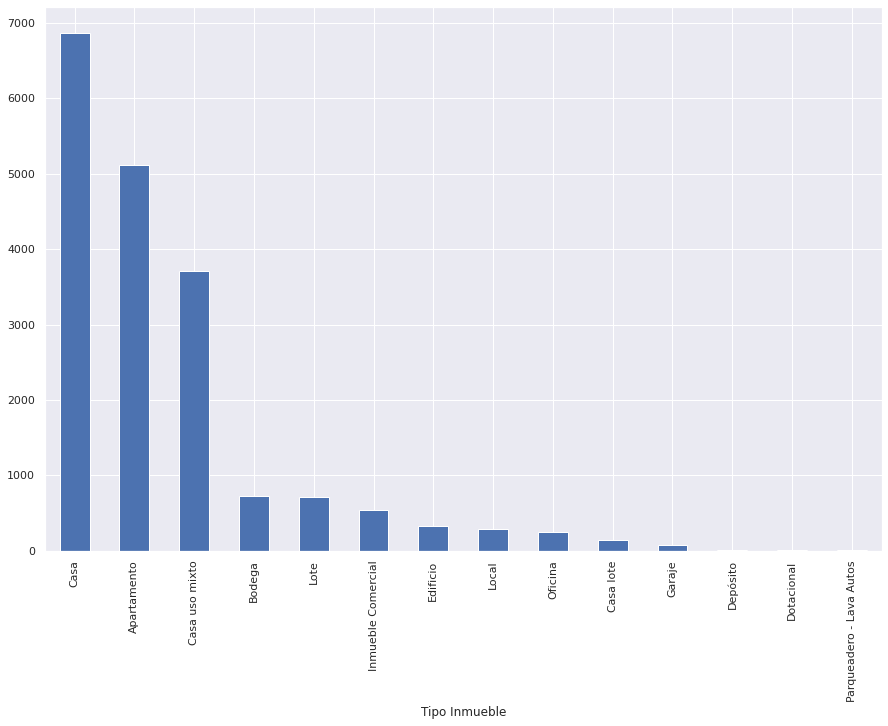

In [ ]:
pd_oferts_copy.groupby('Tipo Inmueble').count()['Codigo Predio'].sort_values(ascending=False).plot.bar(figsize=(15,10))

In [ ]:
pd_oferts_copy.groupby(['Nombre Barrio','Tipo Inmueble']).count()['Codigo Predio'].sort_values(ascending=False).head(20)

Nombre Barrio             Tipo Inmueble
PORVENIR                  Apartamento      186
ATLANTA                   Apartamento      156
SANTA TERESA              Apartamento      122
HIPOTECHO SUR             Apartamento      115
PIO XII                   Apartamento      101
CAPELLANIA                Apartamento      100
PARDO RUBIO               Apartamento       96
NUEVA ZELANDIA            Apartamento       95
SALITRE SUBA              Apartamento       88
SANTA CECILIA             Casa              86
EL DORADO INDUSTRIAL      Apartamento       79
POTOSI                    Casa              77
LOS CEDROS                Apartamento       71
SANTA BARBARA OCCIDENTAL  Apartamento       67
EL TOBERIN                Apartamento       66
TIBANA                    Apartamento       59
LA SOLEDAD                Casa              57
CIUDAD KENNEDY ORIENTAL   Casa              55
HIPOTECHO                 Casa              54
BUENOS AIRES              Apartamento       53
Name: Codigo Predio,

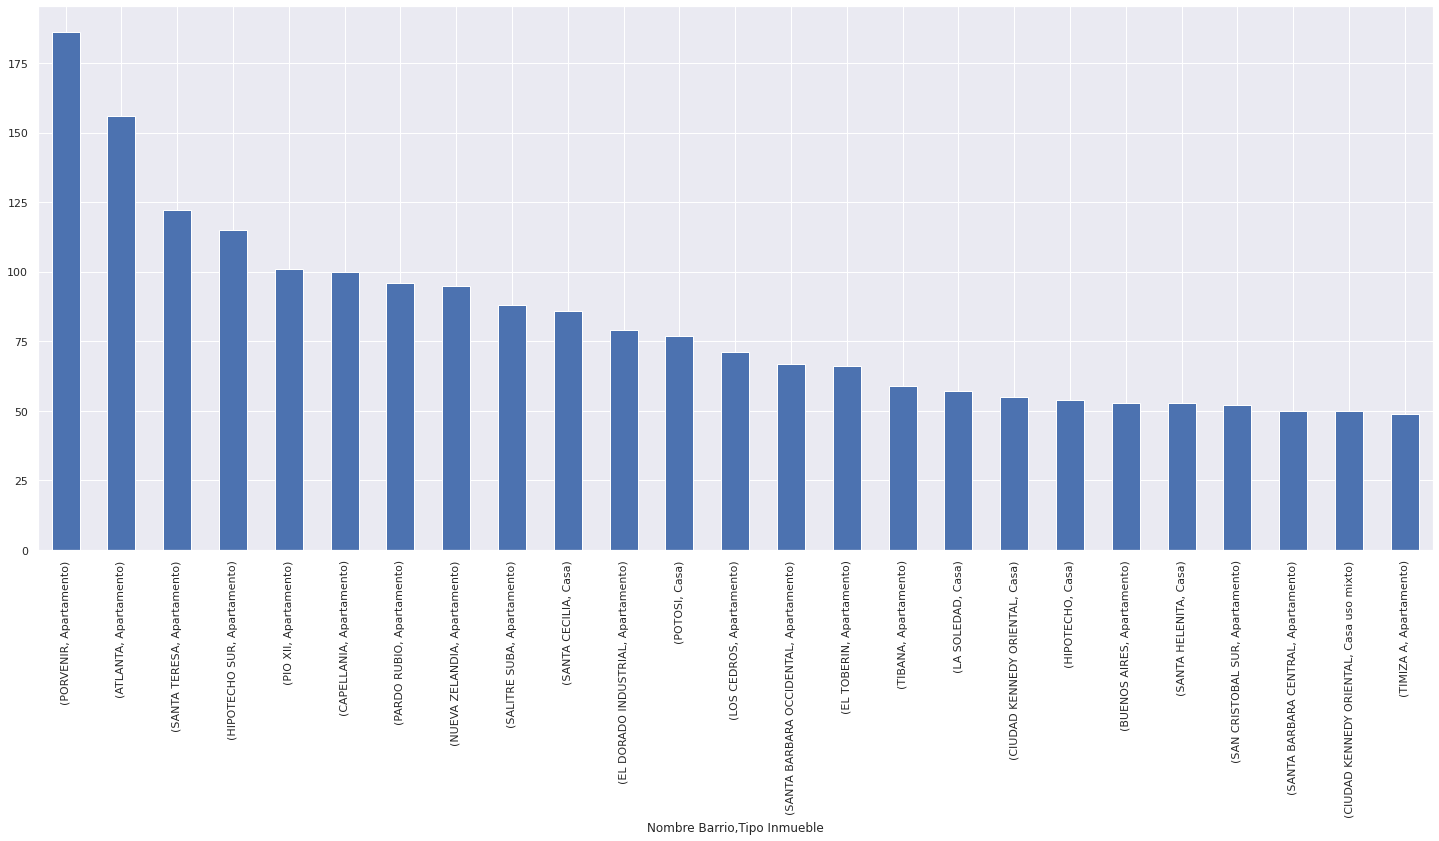

In [ ]:
pd_oferts_copy.groupby(['Nombre Barrio','Tipo Inmueble']).count()['Codigo Predio'].sort_values(ascending=False).head(25).plot.bar(figsize=(25,10))

 In general there're more 'Casa' as Property type but in the top 20 Neighbors there're more 'Apartamentos'

### Describe main numeric columns

In [ ]:
pd_oferts_copy[vr_cols].describe()

,Vr Inicial Venta,Vr Final Venta,Vr Inicial Arriendo,Vr Final Arriendo
count,18786,18786,18786,18786
unique,549,746,431,566
top,0,0,0,0
freq,9091,9091,13275,13279


In [ ]:
for vr in vr_cols:
  pd_oferts_copy[vr] = pd_oferts_copy[vr].map(lambda x: float(x))

pd_oferts_copy.dtypes

Nombre Barrio           object
Codigo Barrio            int64
Codigo Manzana           int64
Codigo Predio            int64
Codigo Construccion      int64
Codigo Resto             int64
Fecha De Cargue         object
Direccion               object
Codigo Oferta           object
Tipo Oferta             object
Tipo Inmueble           object
Fuente                  object
Chip                    object
Area Terreno            object
Area Construida         object
Vr Inicial Venta       float64
Vr Final Venta         float64
Vr Inicial Arriendo    float64
Vr Final Arriendo      float64
dtype: object

In [ ]:
pd_oferts_copy.describe()

,Codigo Barrio,Codigo Manzana,Codigo Predio,Codigo Construccion,Codigo Resto,Vr Inicial Venta,Vr Final Venta,Vr Inicial Arriendo,Vr Final Arriendo
count,18786.000000,18786.000000,18786.000000,18786.000000,18786.00000,1.878600e+04,1.878600e+04,1.878600e+04,1.878600e+04
mean,5332.023848,31.360481,16.003886,1.387150,1418.02949,3.794088e+08,3.716517e+08,9.110453e+05,9.004428e+05
std,2731.475968,24.438576,14.340445,8.543562,5770.91653,3.592018e+09,3.530828e+09,9.802260e+06,9.731890e+06
min,1101.000000,1.000000,1.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4210.000000,11.000000,5.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5111.000000,25.000000,12.000000,0.000000,0.00000,9.000000e+07,8.709300e+07,0.000000e+00,0.000000e+00
75%,7104.000000,46.000000,22.000000,1.000000,1007.00000,3.600000e+08,3.503160e+08,5.800000e+05,5.752500e+05
max,205401.000000,99.000000,99.000000,272.000000,95001.00000,3.500000e+11,3.440000e+11,9.300000e+08,9.210720e+08


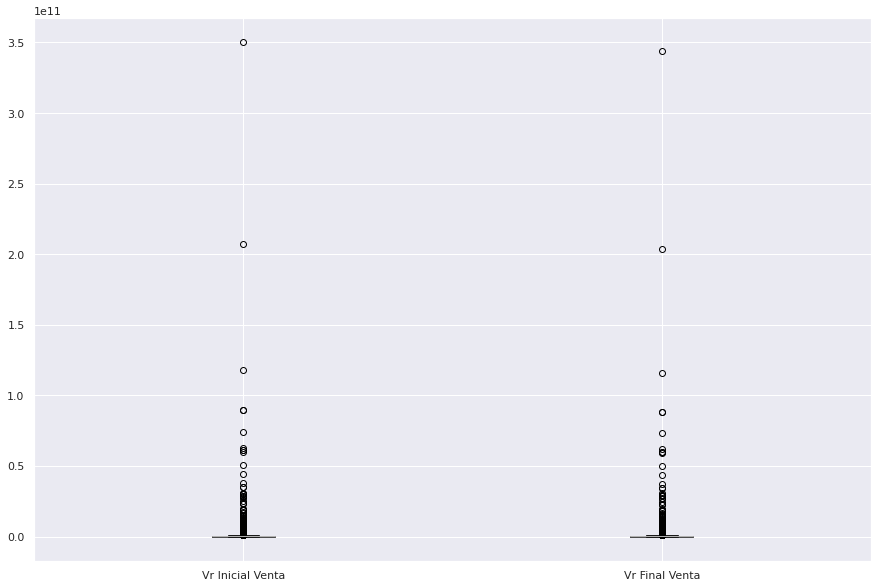

In [ ]:
pd_oferts_copy[['Vr Inicial Venta','Vr Final Venta']].boxplot(figsize=(15,10))

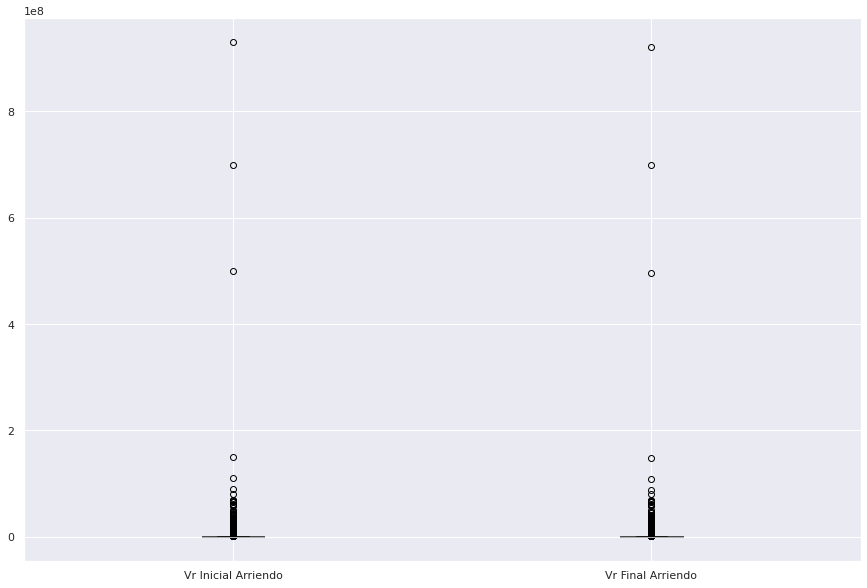

In [ ]:
pd_oferts_copy[['Vr Inicial Arriendo','Vr Final Arriendo']].boxplot(figsize=(15,10))

In [ ]:
pd_oferts_copy['Fecha De Cargue'] = pd.to_datetime(pd_oferts_copy['Fecha De Cargue'])
pd_oferts_copy['Year'] = pd_oferts_copy['Fecha De Cargue'].map(lambda x:x.year)
pd_oferts_copy['Month'] = pd_oferts_copy['Fecha De Cargue'].map(lambda x:x.month)

In [ ]:
pd_oferts_copy.dtypes

Nombre Barrio                       object
Codigo Barrio                        int64
Codigo Manzana                       int64
Codigo Predio                        int64
Codigo Construccion                  int64
Codigo Resto                         int64
Fecha De Cargue        datetime64[ns, UTC]
Direccion                           object
Codigo Oferta                       object
Tipo Oferta                         object
Tipo Inmueble                       object
Fuente                              object
Chip                                object
Area Terreno                        object
Area Construida                     object
Vr Inicial Venta                   float64
Vr Final Venta                     float64
Vr Inicial Arriendo                float64
Vr Final Arriendo                  float64
Year                                 int64
Month                                int64
dtype: object

### Distribution of data upload among time

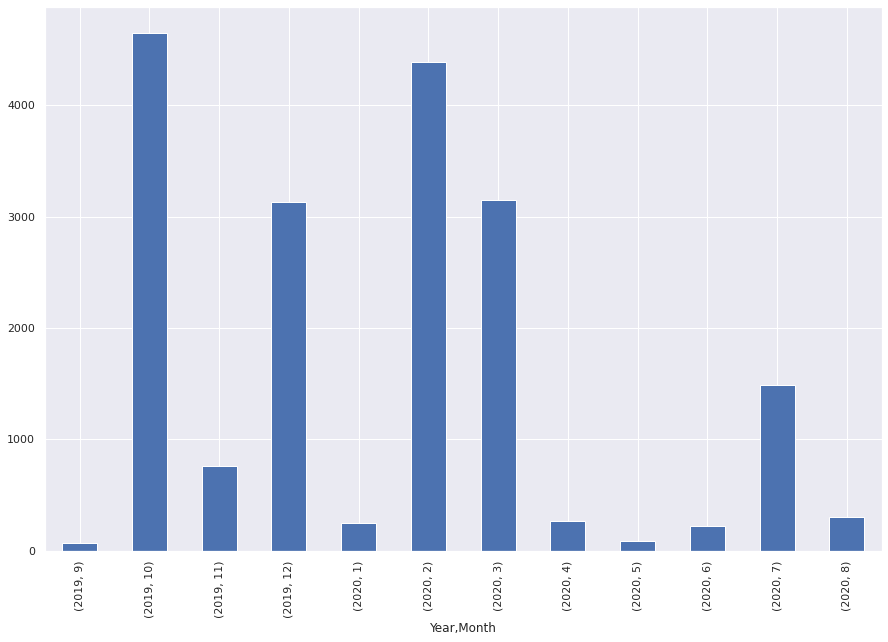

In [ ]:
pd_oferts_copy.groupby(['Year','Month']).count()['Codigo Predio'].plot.bar(figsize=(15,10))

### Distribution of inicial and final sale price

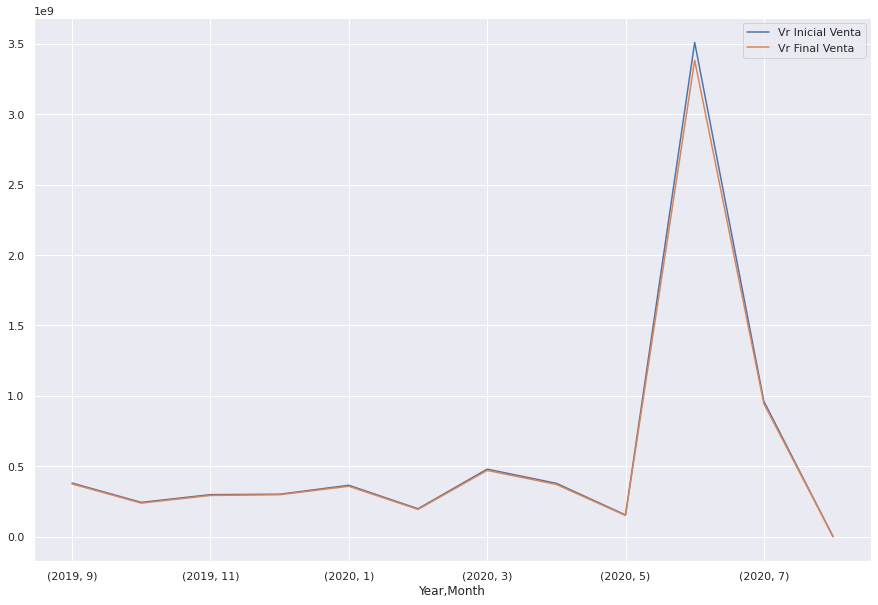

In [ ]:
pd_oferts_copy.groupby(['Year','Month']).mean()[vr_cols[0:2]].plot(figsize=(15,10))

### Distribution of initial and final rent price

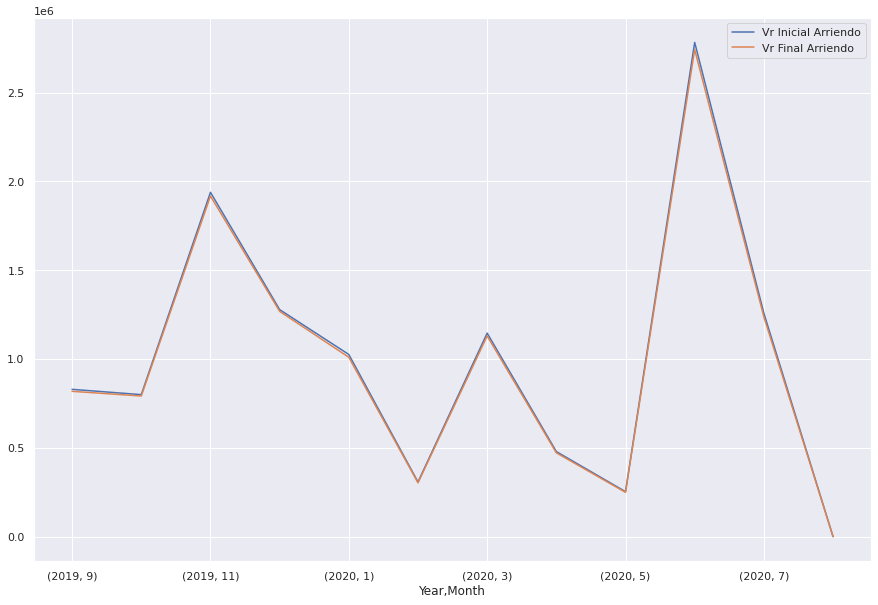

In [ ]:
pd_oferts_copy.groupby(['Year','Month']).mean()[vr_cols[2:4]].plot(figsize=(15,10))

### Correlation prices vs area

In [ ]:
pd_oferts_copy.head()

,Nombre Barrio,Codigo Barrio,Codigo Manzana,Codigo Predio,Codigo Construccion,Codigo Resto,Fecha De Cargue,Direccion,Codigo Oferta,Tipo Oferta,Tipo Inmueble,Fuente,Chip,Area Terreno,Area Construida,Vr Inicial Venta,Vr Final Venta,Vr Inicial Arriendo,Vr Final Arriendo,Year,Month
0,ESTACION CENTRAL,6204,17,15,0,0,2019-09-30 00:00:00+00:00,KR 33 17 27,"5,00E+05",VENTA,Bodega,CAMPO,AAA0251LMRJ,2060.8,2306,7.000000e+09,6.880300e+09,0.0,0.0,2019,9
1,COOPERATIVA DE SUB-OFICIALES,6501,3,10,0,0,2019-09-30 00:00:00+00:00,KR 71F 12 02,500001,VENTA,Casa uso mixto,CAMPO,AAA0080RXPP,100.1,211.3,0.000000e+00,0.000000e+00,0.0,0.0,2019,9
2,ESTACION CENTRAL,6204,4,4,1,6011,2019-09-30 00:00:00+00:00,CL 14 30 17 AP 611,500002,ARRIENDO,Apartamento,CAMPO,AAA0164RCHY,18.04,50.44,0.000000e+00,0.000000e+00,0.0,0.0,2019,9
3,ARBORIZADORA ALTA,2568,10,14,0,0,2019-09-30 00:00:00+00:00,CL 74 SUR 38A 60,500003,ARRIENDO PARCIAL,Casa uso mixto,CAMPO,AAA0028RFAF,42,42,0.000000e+00,0.000000e+00,1200000.0,1178000.0,2019,9
4,ARBORIZADORA ALTA,2568,10,12,0,0,2019-09-30 00:00:00+00:00,CL 74 SUR 38A 52,500004,VENTA,Casa uso mixto,CAMPO,AAA0028REYN,42,130.2,1.500000e+08,1.453350e+08,0.0,0.0,2019,9


In [ ]:
for ar in area_cols:
  pd_oferts_copy[ar] = pd_oferts_copy[ar].map(lambda x: x.replace('-','0'))

pd_oferts_copy.dtypes

Nombre Barrio                       object
Codigo Barrio                        int64
Codigo Manzana                       int64
Codigo Predio                        int64
Codigo Construccion                  int64
Codigo Resto                         int64
Fecha De Cargue        datetime64[ns, UTC]
Direccion                           object
Codigo Oferta                       object
Tipo Oferta                         object
Tipo Inmueble                       object
Fuente                              object
Chip                                object
Area Terreno                        object
Area Construida                     object
Vr Inicial Venta                   float64
Vr Final Venta                     float64
Vr Inicial Arriendo                float64
Vr Final Arriendo                  float64
Year                                 int64
Month                                int64
dtype: object

In [ ]:
for ar in area_cols:
  pd_oferts_copy[ar] = pd_oferts_copy[ar].map(lambda x: float(x))

pd_oferts_copy.dtypes

Nombre Barrio                       object
Codigo Barrio                        int64
Codigo Manzana                       int64
Codigo Predio                        int64
Codigo Construccion                  int64
Codigo Resto                         int64
Fecha De Cargue        datetime64[ns, UTC]
Direccion                           object
Codigo Oferta                       object
Tipo Oferta                         object
Tipo Inmueble                       object
Fuente                              object
Chip                                object
Area Terreno                       float64
Area Construida                    float64
Vr Inicial Venta                   float64
Vr Final Venta                     float64
Vr Inicial Arriendo                float64
Vr Final Arriendo                  float64
Year                                 int64
Month                                int64
dtype: object

In [ ]:
corrMatrix = pd_oferts_copy[['Area Terreno','Area Construida','Vr Inicial Venta','Vr Final Venta']].corr()
corrMatrix

,Area Terreno,Area Construida,Vr Inicial Venta,Vr Final Venta
Area Terreno,1.000000,0.253856,0.483457,0.483922
Area Construida,0.253856,1.000000,0.051896,0.051778
Vr Inicial Venta,0.483457,0.051896,1.000000,0.999534
Vr Final Venta,0.483922,0.051778,0.999534,1.000000


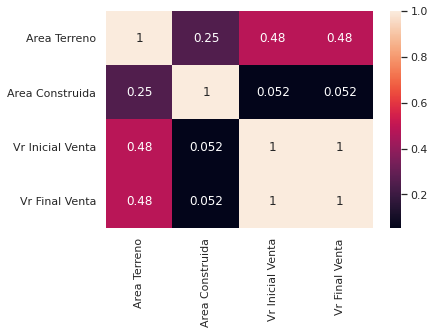

In [ ]:
sns.heatmap(corrMatrix, annot=True)